In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def infec(N, V, M, eta, r_in, inhib, T_LI, T_LO):
    #Arrays counting progress towards LI and LO
    active = np.zeros(N, dtype = bool)
    dead = np.zeros(N, dtype = bool)
    LI = np.zeros(N)
    LO = np.zeros(N)

    #Initial conditions
    time = 0
    N_LI = 0
    N_LO = 0

    #Infection rates
    r_out = eta * M/V

    N = np.count_nonzero(~dead)
    A = np.count_nonzero(active)
    while np.any(~dead):
        #Draw random numbers and collect transition time
        W = r_in * A + r_out * N
        x1, x2 = [np.random.uniform(0,1), np.random.uniform(0,1)]
        tau = -1/W * np.log(x1)

        if N * r_out >= x2 * W: #LO progress
            indices = np.where(~dead)[0]
            Bac = np.random.choice(indices)
            active[Bac] = True
            LO[Bac] += 1
            LI[Bac] = max(0, LI[Bac] - inhib)
            M -= 1

            if LO[Bac] >= T_LO: #LO occurs
                active[Bac] = False
                dead[Bac] = True
                M += 100
                N -= 1
                N_LO += 1
            
            r_out = eta * M/V
        
        else: #LI progress
            indices = np.where(active & ~dead)[0]
            Bac = np.random.choice(indices)

            LI[Bac] += 1

            if LI[Bac] >= T_LI: #LI occurs
                active[Bac] = False
                dead[Bac] = True
                M += 100
                N -= 1
                r_out = eta * M/V
                N_LI += 1

        N = np.count_nonzero(~dead)
        A = np.count_nonzero(active)

        time += tau
    return N_LI, N_LO, np.average(LO)

In [ ]:
N = 1
V = 0.01
eta = 2 * 10**(-9)
rin = np.linspace(0.1, 20, 20)
T_LI = 250
T_LO = 100
inhib = 250/27 * 5
nLO = np.arange(66, 74)
Ratio_e = []
Ratio_avg = []

for n_LO in nLO:
    Ratio = []
    for r_in in rin:
        M = (V/eta)* T_LO * r_in/(T_LI + n_LO * inhib)
        #r_in = (inhib*100 + T_LI) * (eta*M/V)/T_LO
        N_LO_tot = 0
        N_LI_tot = 0

        for i in range(1000):
            N_LI, N_LO = infec(N, V, M, eta, r_in, inhib, T_LI, T_LO)
            N_LI_tot += N_LI
            N_LO_tot += N_LO
        
        Ratio.append(N_LO_tot/(N_LI_tot + N_LO_tot))
    
    Ratio_avg.append(np.average(Ratio))
    Ratio_e.append(np.std(Ratio))
    
print(Ratio)
print(Ratio_avg)
print(Ratio_e)

In [36]:
Ratio2 = []
N_LO_tot = 0
N_LI_tot = 0
r_in = 250/27
M = (V/eta)* T_LO * r_in/(T_LI + 72 * inhib)
for j in range(50):
    for i in range(1000):
                N_LI, N_LO = infec(N, V, M, eta, r_in, inhib, T_LI, T_LO)
                N_LI_tot += N_LI
                N_LO_tot += N_LO

    Ratio = N_LO_tot/(N_LI_tot + N_LO_tot)
    Ratio2.append(Ratio)

Text(0.5, 0, 'Ratio')

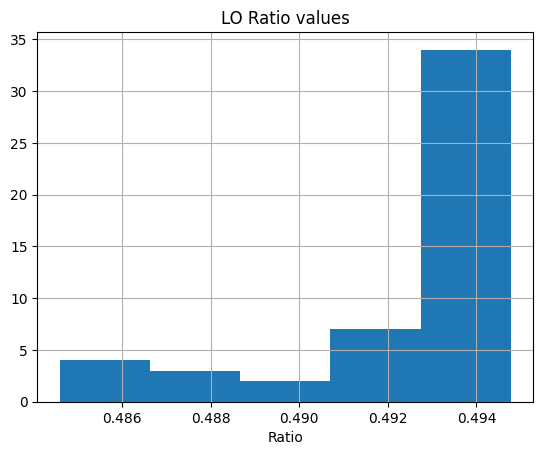

In [45]:
plt.grid()
plt.title('LO Ratio values')
plt.hist(Ratio2, bins = 5)
plt.xlabel('Ratio')

Text(0.5, 0, '$n_{LO}$')

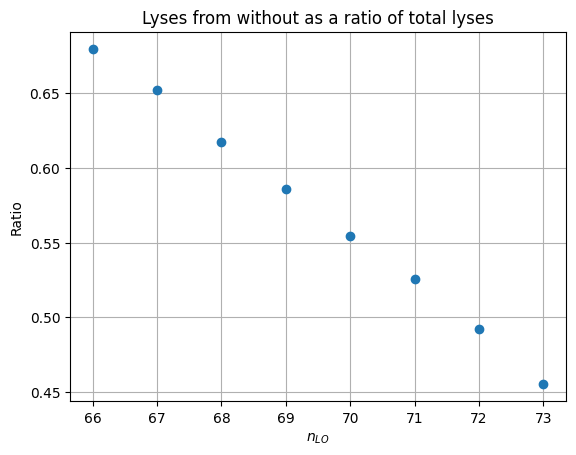

In [37]:
plt.grid()
plt.title('Lyses from without as a ratio of total lyses')
plt.errorbar(nLO, Ratio_avg, yerr = np.array(Ratio_e)/np.sqrt(1000), fmt='o', ecolor = 'red')
plt.ylabel('Ratio')
plt.xlabel('$n_{LO}$')